# Assignment 8
Using any dataset that has a categorical feature that needs to be predicted, use several algorithms, preprocessing techniques, feature extraction techniques to fit the data to the model and show the accuracy, confusion matrix, and the classification report. G
https://www.kaggle.com/ntnu-testimon/paysim1
https://www.kaggle.com/joniarroba/noshowappointments
https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
# Sorry for the long assignment length. I was having a lot of fun.

In [2]:
!ls ../data

2016-Q1-Trips-History-Data.csv
2016-Q1-cabi-trip-history-data.zip
3D_spatial_network.txt.gz
Auto.csv
Auto.data
College.csv
Credit.csv
Heart.csv
KDCA-201601.csv
KDCA-201602.csv
KDCA-201603.csv
MCFRS_Incidents_by_Station.csv
USCensus1990.data.txt.gz
beers.csv
breweries.csv
chipotle.tsv
creditcardnumbers.txt
dates.txt
dates2.txt
emails.txt
estimating_coefficients.png
kobe.csv
messy.txt
phonenumbers.txt
pima-indians-diabetes.data
population - Data Source","World Development Indicators 2016-04-11.csv
sms.tsv
snow_tweets.csv
stockholm.csv
stockholm_td_adj.dat
years.txt


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

from sklearn import svm, datasets, preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../data/MCFRS_Incidents_by_Station.csv")
df_raw = df.copy()
df.head()

,Fire Station,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,Station address
0,Kensington Volunteer Fire Department (Station 18),18,PREGNANCY,2,2017,MAY,5,"12251 Georgia Ave Wheaton, MD 20902"
1,Sandy Spring Volunteer Fire Department (40),40,BACK PAIN,5,2018,SEPTEMBER,9,"16911 Georgia Ave Olney, MD 20832"
2,Kensington Volunteer Fire Department (Station 5),5,SICK,34,2018,SEPTEMBER,9,"10620 Connecticut Ave Kensington, MD 20985"
3,Silver Spring Volunteer Fire Department (Stati...,19,ELECTRICAL,1,2014,JANUARY,1,"1945 Seminary Rd Silver Spring, MD 20910"
4,Silver Spring Volunteer Fire Department (Stati...,16,INHALATION,1,2017,JUNE,6,"111 University Blvd East Silver Spring, MD 20901"


In [4]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data



In [5]:
df.describe()

,Fire Station Number,Monthly Total,Year,Month Num
count,76016.000000,76016.000000,76016.000000,76016.000000
mean,18.358767,7.425095,2015.774061,6.449445
std,10.660218,11.194176,1.468064,3.438509
min,1.000000,1.000000,2013.000000,1.000000
25%,9.000000,1.000000,2015.000000,3.000000
50%,18.000000,3.000000,2016.000000,6.000000
75%,28.000000,8.000000,2017.000000,9.000000
max,40.000000,153.000000,2018.000000,12.000000


In [6]:
draw_missing_data_table(df)

,Total,Percent
Nature of 911 call,216,0.002842
Station address,0,0.000000
Month Num,0,0.000000
Month,0,0.000000
Year,0,0.000000
Monthly Total,0,0.000000
Fire Station Number,0,0.000000
Fire Station,0,0.000000


In [7]:
df.head()

,Fire Station,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,Station address
0,Kensington Volunteer Fire Department (Station 18),18,PREGNANCY,2,2017,MAY,5,"12251 Georgia Ave Wheaton, MD 20902"
1,Sandy Spring Volunteer Fire Department (40),40,BACK PAIN,5,2018,SEPTEMBER,9,"16911 Georgia Ave Olney, MD 20832"
2,Kensington Volunteer Fire Department (Station 5),5,SICK,34,2018,SEPTEMBER,9,"10620 Connecticut Ave Kensington, MD 20985"
3,Silver Spring Volunteer Fire Department (Stati...,19,ELECTRICAL,1,2014,JANUARY,1,"1945 Seminary Rd Silver Spring, MD 20910"
4,Silver Spring Volunteer Fire Department (Stati...,16,INHALATION,1,2017,JUNE,6,"111 University Blvd East Silver Spring, MD 20901"


In [8]:
df.dtypes

Fire Station           object
Fire Station Number     int64
Nature of 911 call     object
Monthly Total           int64
Year                    int64
Month                  object
Month Num               int64
Station address        object
dtype: object

In [9]:
df.drop('Station address', axis=1, inplace=True)
df.head()

,Fire Station,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num
0,Kensington Volunteer Fire Department (Station 18),18,PREGNANCY,2,2017,MAY,5
1,Sandy Spring Volunteer Fire Department (40),40,BACK PAIN,5,2018,SEPTEMBER,9
2,Kensington Volunteer Fire Department (Station 5),5,SICK,34,2018,SEPTEMBER,9
3,Silver Spring Volunteer Fire Department (Stati...,19,ELECTRICAL,1,2014,JANUARY,1
4,Silver Spring Volunteer Fire Department (Stati...,16,INHALATION,1,2017,JUNE,6


In [10]:
df['station'] = df['Fire Station Number']
df['nature'] = df['Nature of 911 call']
df['BYstations'] = df.groupby('Year')['station'].cumcount()
df['MonthNum'] = df['Month Num']
df['MonthTotal'] = df['Monthly Total']

station = df.groupby('Fire Station Number').agg('count')
station['Station'] = station.index

nature = df.groupby('Nature of 911 call').agg('count')
nature['Nature'] = nature.index

months = df.groupby('Month Num').agg('count')
months['Month'] = months.index

years = df.groupby('Year').agg('count')
years['Year'] = years.index

In [11]:
years.head()

,Fire Station,Fire Station Number,Nature of 911 call,Monthly Total,Month,Month Num,station,nature,BYstations,MonthNum,MonthTotal,Year
Year,,,,,,,,,,,,
2013,3004,3004,3004,3004,3004,3004,3004,3004,3004,3004,3004,2013
2014,15843,15843,15843,15843,15843,15843,15843,15843,15843,15843,15843,2014
2015,15178,15178,15178,15178,15178,15178,15178,15178,15178,15178,15178,2015
2016,15001,15001,15001,15001,15001,15001,15001,15001,15001,15001,15001,2016
2017,15279,15279,15236,15279,15279,15279,15279,15236,15279,15279,15279,2017


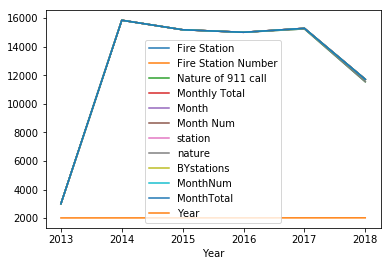

In [12]:
years.plot()

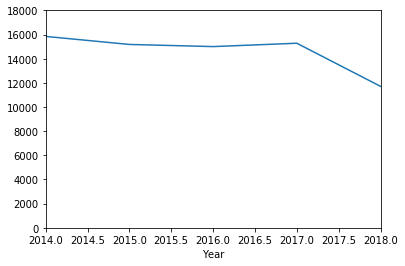

In [13]:
# obviously, the data size is not correct for year 2013
years = years.drop([2013])
years.station.plot(ylim=(0, 18000), xlim=(2014, 2018))

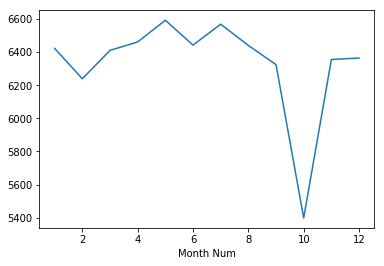

In [14]:
months.Year.plot()
# There is a dip in the calls for October.

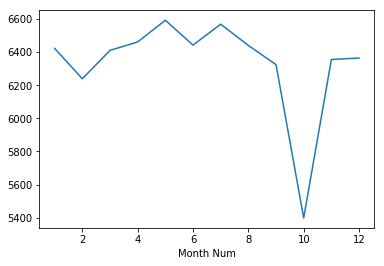

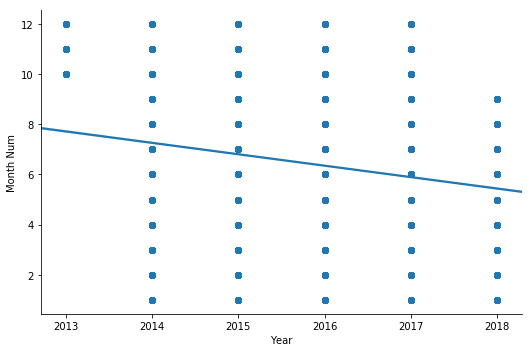

In [15]:
months = df.groupby('Month Num').agg('count')
months['Month'] = months.index

months.Year.plot()
sns.lmplot(y='Month Num', x='Year', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

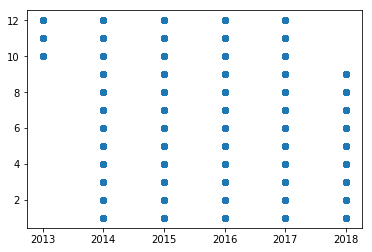

In [16]:
from sklearn import linear_model # adding additional module not already listed from above

x_times = df[['Year']]
y_starting = df.MonthNum

plt.scatter(x_times, y_starting)

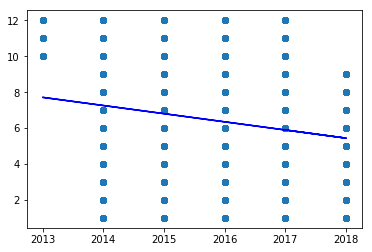

In [17]:
# For my reference - Setting up regular linear regresssion
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_times, y_starting)

# Plotting
plt.scatter(x_times, y_starting)
plt.plot(x_times, x_times*linear.coef_ + linear.intercept_, c = "b" )

In [18]:
# Model 1, polynomial linear regression x25 degree
from sklearn.preprocessing import PolynomialFeatures

poly_25 = PolynomialFeatures(degree=25)
x_25 = poly_25.fit_transform(x_times) # got rid of .reshape
x_25

array([[1.00000000e+00, 2.01700000e+03, 4.06828900e+06, ...,
        1.01914425e+76, 2.05561395e+79, 4.14617335e+82],
       [1.00000000e+00, 2.01800000e+03, 4.07232400e+06, ...,
        1.03082923e+76, 2.08021338e+79, 4.19787060e+82],
       [1.00000000e+00, 2.01800000e+03, 4.07232400e+06, ...,
        1.03082923e+76, 2.08021338e+79, 4.19787060e+82],
       ...,
       [1.00000000e+00, 2.01300000e+03, 4.05216900e+06, ...,
        9.73658865e+75, 1.95997530e+79, 3.94543027e+82],
       [1.00000000e+00, 2.01800000e+03, 4.07232400e+06, ...,
        1.03082923e+76, 2.08021338e+79, 4.19787060e+82],
       [1.00000000e+00, 2.01800000e+03, 4.07232400e+06, ...,
        1.03082923e+76, 2.08021338e+79, 4.19787060e+82]])

In [19]:
linear = linear_model.LinearRegression()
linear.fit(x_25, y_starting)
linear.coef_, linear.intercept_

# So far just copy and pasting

(array([ 3.72210781e-073, -9.27556285e-076,  9.23784262e-080,
         4.11804607e-084, -1.80216118e-129, -4.12057021e-126,
        -8.96969386e-123, -1.88719320e-119, -3.86413690e-116,
        -7.73115120e-113, -1.51497895e-109, -2.91104116e-106,
        -5.48639626e-103, -1.01366803e-099, -1.83356543e-096,
        -3.23971470e-093, -5.57215089e-090, -9.28121459e-087,
        -1.48554980e-083, -2.25755280e-080, -3.19316067e-077,
        -4.05470372e-074, -4.28085343e-071, -3.00685202e-068,
         2.85896138e-071, -6.80767460e-075]), 1007717.7014670605)

In [20]:
ridge = linear_model.Ridge()
ridge.fit(x_25, y_starting)
ridge.coef_, ridge.intercept_

(array([-6.26620691e-68,  3.42154920e-66,  3.79511690e-67,  1.97140078e-67,
        -1.48693345e-68, -2.16716224e-67, -2.00672681e-68, -3.39900429e-68,
         1.43901868e-68, -3.99425461e-68,  5.07532915e-68,  7.27248520e-69,
        -5.50549106e-70,  2.59417278e-69,  3.16616283e-68, -2.26605507e-68,
         1.17804467e-68,  1.68483788e-68, -2.39095433e-67, -1.42064068e-67,
        -6.03289717e-67,  2.17119696e-66, -8.76352843e-67, -2.88246636e-68,
         2.79990547e-71, -6.71401308e-75]), 1009626.6438529128)

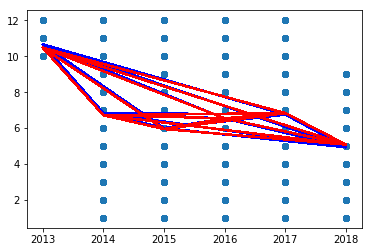

In [21]:
# Model 1 : 25 
import numpy as np # I didn't need to until now

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_25, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_25, ridge.coef_) + ridge.intercept_, c='r')

In [ ]:



# What... in the world...?




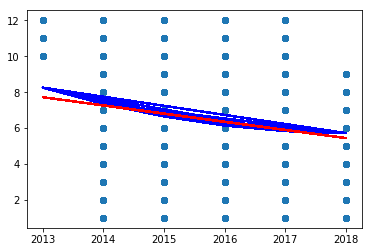

In [22]:
# Model 2, polynomial linear regression x2 degree
# More concise this time.
poly_2 = PolynomialFeatures(degree=2)
x_2 = poly_2.fit_transform(x_times) # got rid of .reshape
linear.fit(x_2, y_starting)
ridge.fit(x_2, y_starting)

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_2, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_2, ridge.coef_) + ridge.intercept_, c='r')

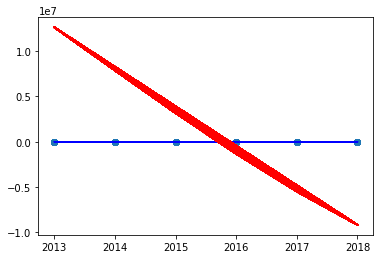

In [23]:
# Model 3, polynomial linear regression x12 degree
poly_12 = PolynomialFeatures(degree=12)
x_12 = poly_12.fit_transform(x_times) # got rid of .reshape
linear.fit(x_12, y_starting)
ridge.fit(x_12, y_starting)

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_12, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_12, ridge.coef_) + ridge.intercept_, c='r')

In [24]:
# Let's try this again. I think month by year did not work because
# the graphs is essentially saying that... there are calls every month
# for every year. 2013 and 2018 are exceptions because there are no
# collected data obviously.

# I'm going to try to collect something unique. Too bad I we don't have
# data categorized by days.

BYnature = df.groupby(['MonthNum', 'nature']).size()

BYnature

MonthNum  nature                   
1         ABDOMINAL PAIN               167
          ALLERGIC                     131
          ANIMAL BITE                   26
          ASSAULT                      127
          ASSIST CITIZEN                64
          ASSIST POLICE                 61
          BACK PAIN                    147
          BLEEDING                     158
          BOMB PRESENT                  72
          BOMB THREAT                    6
          BRUSH FIRE                    17
          BUILDING FIRE                 71
          BURNS                         28
          CARBON MONOXIDE ALARM         61
          CARDIAC ARREST               143
          CHEST PAIN                   170
          CHOKING                       95
          CO ALARM                      94
          DIABETIC                     154
          DROWNING                       2
          DUMPSTER FIRE                  8
          ELECTRICAL                   115
          ELECTRIC

In [25]:
df.drop('Fire Station', axis=1, inplace=True)
df.head()

,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,station,nature,BYstations,MonthNum,MonthTotal
0,18,PREGNANCY,2,2017,MAY,5,18,PREGNANCY,0,5,2
1,40,BACK PAIN,5,2018,SEPTEMBER,9,40,BACK PAIN,0,9,5
2,5,SICK,34,2018,SEPTEMBER,9,5,SICK,1,9,34
3,19,ELECTRICAL,1,2014,JANUARY,1,19,ELECTRICAL,0,1,1
4,16,INHALATION,1,2017,JUNE,6,16,INHALATION,1,6,1


In [26]:
def yes_no(s):
    if s == "FALLS":
        return 1
    elif s != "FALLS":
        return 0

df.nature.apply(yes_no).head()

0    0
1    0
2    0
3    0
4    0
Name: nature, dtype: int64

In [27]:
df['falls_num'] = df.nature.apply(yes_no)
df.head()

,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,station,nature,BYstations,MonthNum,MonthTotal,falls_num
0,18,PREGNANCY,2,2017,MAY,5,18,PREGNANCY,0,5,2,0
1,40,BACK PAIN,5,2018,SEPTEMBER,9,40,BACK PAIN,0,9,5,0
2,5,SICK,34,2018,SEPTEMBER,9,5,SICK,1,9,34,0
3,19,ELECTRICAL,1,2014,JANUARY,1,19,ELECTRICAL,0,1,1,0
4,16,INHALATION,1,2017,JUNE,6,16,INHALATION,1,6,1,0


In [28]:
def plot_svm(i, clf, title, X, y, col1, col2):
    
    h = .2  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
    y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_stack = np.stack([xx.flatten(), yy.flatten()]).T

    x1 = X[col1]
    x2 = X[col2]
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(scale(grid_stack)).reshape(xx.shape)
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    x_s = preprocessing.scale(X)

    # Plot also the training points
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

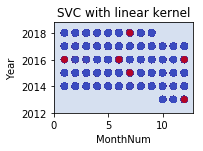

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

col1, col2 = 'MonthNum', 'Year'

X = df[[col1, col2]]                    
y = df['falls_num']

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors

svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)


plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)


plt.show()



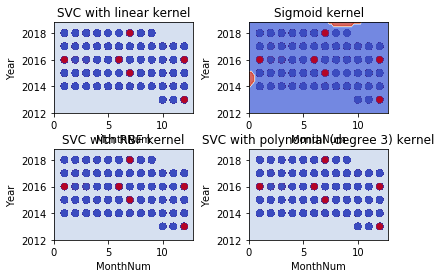

In [30]:
C=1.0
X_scaled = preprocessing.scale(X)
svc = svm.SVC(kernel='linear', C=1.0).fit(X_scaled, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)
# title for the plots
titles = ['SVC with linear kernel',
          'Sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, sig_svc, rbf_svc, poly_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

# Not that I really understand the implactions of any of these

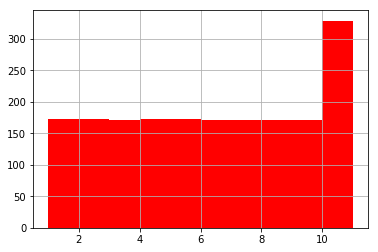

In [31]:
df[(df.falls_num==1)].MonthNum.hist(bins=np.arange(1,12,1), alpha=1, color="red")

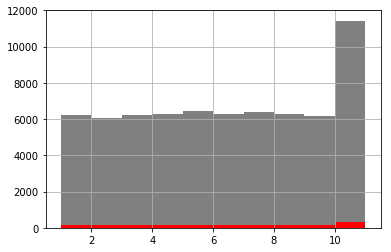

In [32]:
df[(df.falls_num==0)].MonthNum.hist(bins=np.arange(1,12,1), alpha=1, color="grey")
df[(df.falls_num==1)].MonthNum.hist(bins=np.arange(1,12,1), alpha=1, color="red")

In [33]:
# VERY INTERESTING.... The November and December incidents are both high
# for total incidents as well as falls injury... and... the shapes are
# nearly identical!!!!!

In [34]:
from sklearn.preprocessing import MinMaxScaler
df['fallsL'] = df.falls_num
df.fallsL = (df.fallsL - min(df.fallsL)) / ( max(df.fallsL) - min(df.fallsL))
df.fallsL

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       1.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
75986    0.0
75987    0.0
75988    0.0
75989    0.0
75990    0.0
75991    0.0
75992    0.0
75993    0.0
75994    0.0
75995    0.0
75996    0.0
75997    0.0
75998    0.0
75999    0.0
76000    0.0
76001    0.0
76002    0.0
76003    0.0
76004    0.0
76005    0.0
76006    0.0
76007    0.0
76008    0.0
76009    0.0
76010    0.0
76011    0.0
76012    0.0
76013    0.0
76014    0.0
76015    0.0
Name: fallsL, Length: 76016, dtype: float64

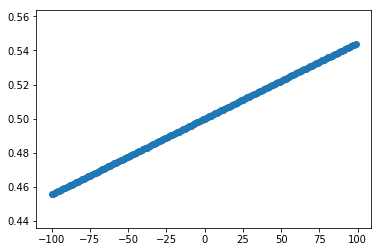

In [35]:
from sklearn.linear_model import LogisticRegression as Model

feature_cols = ['Year', 'Month Num']
X = df[feature_cols]
y = df.fallsL

model = Model()
model.fit(X, y)
df['pred'] = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(df.fallsL, df.pred.round())

fallness = np.arange(-100, 100)
time = np.array([0]*200) 
x_trial = np.column_stack((fallness, time))
model.predict_proba(x_trial)
plt.scatter(fallness, model.predict_proba(x_trial)[:,0])

In [36]:
BYnature

MonthNum  nature                   
1         ABDOMINAL PAIN               167
          ALLERGIC                     131
          ANIMAL BITE                   26
          ASSAULT                      127
          ASSIST CITIZEN                64
          ASSIST POLICE                 61
          BACK PAIN                    147
          BLEEDING                     158
          BOMB PRESENT                  72
          BOMB THREAT                    6
          BRUSH FIRE                    17
          BUILDING FIRE                 71
          BURNS                         28
          CARBON MONOXIDE ALARM         61
          CARDIAC ARREST               143
          CHEST PAIN                   170
          CHOKING                       95
          CO ALARM                      94
          DIABETIC                     154
          DROWNING                       2
          DUMPSTER FIRE                  8
          ELECTRICAL                   115
          ELECTRIC

In [37]:
def yes_no(x):
    if x == "SUICIDE":
        return 1
    elif x != "SUICIDE":
        return 0

In [38]:
df['SUICIDE'] = df.nature.apply(yes_no)
df.head()

,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,station,nature,BYstations,MonthNum,MonthTotal,falls_num,fallsL,pred,SUICIDE
0,18,PREGNANCY,2,2017,MAY,5,18,PREGNANCY,0,5,2,0,0.0,0.0,0
1,40,BACK PAIN,5,2018,SEPTEMBER,9,40,BACK PAIN,0,9,5,0,0.0,0.0,0
2,5,SICK,34,2018,SEPTEMBER,9,5,SICK,1,9,34,0,0.0,0.0,0
3,19,ELECTRICAL,1,2014,JANUARY,1,19,ELECTRICAL,0,1,1,0,0.0,0.0,0
4,16,INHALATION,1,2017,JUNE,6,16,INHALATION,1,6,1,0,0.0,0.0,0


In [39]:
def yes_no(x):
    if x == "FIRE ALARM":
        return 1
    elif x != "FIRE ALARM":
        return 0

In [40]:
df['FIRE_ALARM'] = df.nature.apply(yes_no)
df.head()

,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,station,nature,BYstations,MonthNum,MonthTotal,falls_num,fallsL,pred,SUICIDE,FIRE_ALARM
0,18,PREGNANCY,2,2017,MAY,5,18,PREGNANCY,0,5,2,0,0.0,0.0,0,0
1,40,BACK PAIN,5,2018,SEPTEMBER,9,40,BACK PAIN,0,9,5,0,0.0,0.0,0,0
2,5,SICK,34,2018,SEPTEMBER,9,5,SICK,1,9,34,0,0.0,0.0,0,0
3,19,ELECTRICAL,1,2014,JANUARY,1,19,ELECTRICAL,0,1,1,0,0.0,0.0,0,0
4,16,INHALATION,1,2017,JUNE,6,16,INHALATION,1,6,1,0,0.0,0.0,0,0


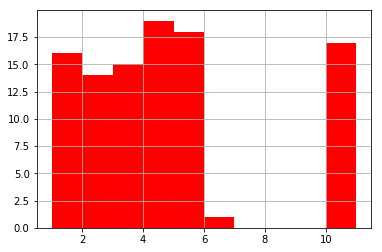

In [41]:
df[(df.SUICIDE==1)].MonthNum.hist(bins=np.arange(1,12,1), alpha=1, color="red")

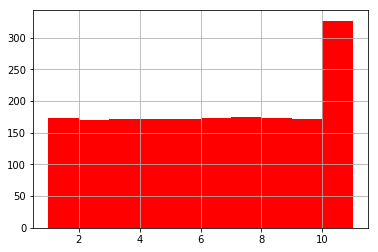

In [42]:
df[(df.FIRE_ALARM==1)].MonthNum.hist(bins=np.arange(1,12,1), alpha=1, color="red")

In [43]:
feature_cols = [df[(df.FIRE_ALARM==1)], df[(df.SUICIDE==1)], df[(df.falls_num==1)]]

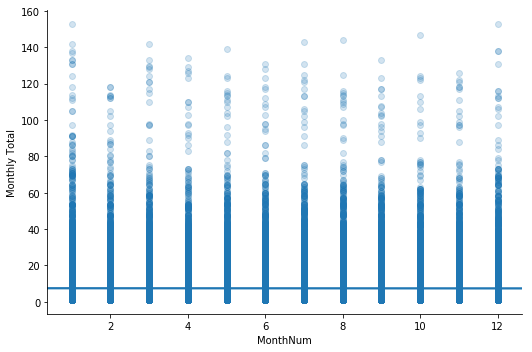

In [44]:
sns.lmplot(x='MonthNum', y='Monthly Total', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

In [45]:
# create X and y
feature_cols = ['Month Num']
X = df[feature_cols]
y = df.MonthTotal

# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

7.4705716373380255
[-0.00705129]


In [46]:
linreg.intercept_ + linreg.coef_ * 77

array([6.92762214])

In [47]:
linreg.predict(77)

array([6.92762214])

In [48]:
df.head()

,Fire Station Number,Nature of 911 call,Monthly Total,Year,Month,Month Num,station,nature,BYstations,MonthNum,MonthTotal,falls_num,fallsL,pred,SUICIDE,FIRE_ALARM
0,18,PREGNANCY,2,2017,MAY,5,18,PREGNANCY,0,5,2,0,0.0,0.0,0,0
1,40,BACK PAIN,5,2018,SEPTEMBER,9,40,BACK PAIN,0,9,5,0,0.0,0.0,0,0
2,5,SICK,34,2018,SEPTEMBER,9,5,SICK,1,9,34,0,0.0,0.0,0,0
3,19,ELECTRICAL,1,2014,JANUARY,1,19,ELECTRICAL,0,1,1,0,0.0,0.0,0,0
4,16,INHALATION,1,2017,JUNE,6,16,INHALATION,1,6,1,0,0.0,0.0,0,0


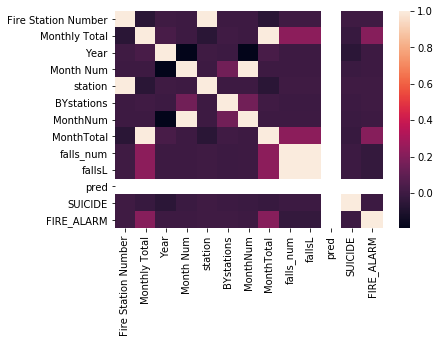

In [49]:
sns.heatmap(df.corr())

In [50]:
p = df.drop(['Year', 'Month', 'Month Num', 'nature', 'station', 'BYstations', 'MonthNum','MonthTotal','falls_num','fallsL','pred','SUICIDE','FIRE_ALARM'], axis=1)
p

,Fire Station Number,Nature of 911 call,Monthly Total
0,18,PREGNANCY,2
1,40,BACK PAIN,5
2,5,SICK,34
3,19,ELECTRICAL,1
4,16,INHALATION,1
5,8,EYE INJURY,3
6,20,MEDICAL INCIDENT,7
7,15,SICK,56
8,22,FIRE ALARM,16
9,19,PALLATIVE CARE,24


In [51]:
FS = pd.pivot_table(p, index = ['Nature of 911 call'], columns = ['Fire Station Number'])
FS

Monthly Total                                   \
Fire Station Number                  1          2          3          4    
Nature of 911 call                                                         
ABDOMINAL PAIN                10.866667   4.932203  11.203390   2.250000   
AIRPLANE INCIDENT                   NaN        NaN        NaN   1.000000   
ALARM / SPRINKLR OOS                NaN        NaN        NaN        NaN   
ALLERGIC                       3.581818   1.958333   4.779661   1.575000   
ANIMAL BITE                    1.461538   1.000000   1.230769   1.000000   
ASSAULT                        6.389831   2.870370   4.321429   1.230769   
ASSIST CITIZEN                 7.894737   7.105263  10.850000   2.058824   
ASSIST POLICE                  2.294118   2.189189   2.105263   1.142857   
BACK PAIN                      4.616667   2.461538   4.650000   1.461538   
BARN FIRE                           NaN        NaN        NaN        NaN   
BLEEDING                       9.550000   5.389831  10.150000   2.735849   
BOMB PRESENT                   4.469388   1.111111   3.048780   1.142857   
BOMB THREAT                    1.000000   1.000000   1.000000        NaN   
BRUSH FIRE                     2.000000   2.000000   2.230769   1.285714   
BUILDING FIRE                  4.434783   3.227273   5.000000   1.923077   
BURNS                          1.100000   1.000000   1.200000   1.000000   
CARBON MONOXIDE ALARM          1.666667   3.000000   3.263158   1.142857   
CARDIAC ARREST                 3.145455   2.180000   3.741379   1.585366   
CHEST PAIN                    20.950000   8.600000  25.933333   4.431034   
CHOKING                        2.029412   1.461538   1.860000   1.571429   
CO ALARM                       2.033333   2.578947   4.461538   1.461538   
COLLAPSE RESCUE                     NaN        NaN        NaN        NaN   
CONFINE SPACE RESCUE                NaN        NaN        NaN        NaN   
CYLINDER LEAK OUTSDE                NaN        NaN        NaN        NaN   
DIABETIC                       5.474576   3.490909   6.600000   1.743590   
DROWNING                            NaN   1.000000   1.166667   1.000000   
DUMPSTER FIRE                  1.400000        NaN   1.416667        NaN   
ELECTRICAL                     3.659574   3.404762   3.549020   2.375000   
ELECTRICAL SHORT                    NaN        NaN        NaN        NaN   
ELECTROCUTION                  1.000000   1.000000   1.000000   1.000000   
...                                 ...        ...        ...        ...   
PSYCHIATRIC                    8.525424   3.017241   9.677966   1.658537   
RESCUE                              NaN        NaN   1.000000        NaN   
RESET ALARM SYSTEM             1.000000   1.500000   2.750000   1.000000   
SEIZURE                       12.406780   5.051724  12.600000   2.489796   
SERIVCE CALL-LIFT ASSIST       3.846154   3.305556   4.350000   2.103448   
SERVICE CALL                  11.951220   8.804878  12.878049   2.794872   
SEWER FIRE                     1.000000        NaN        NaN        NaN   
SICK                          57.000000  27.416667  58.866667  12.850000   
SMOKE IN THE AREA              1.444444   1.312500   2.100000   1.250000   
SMOKE ODOR                     2.571429   1.600000   2.200000   1.111111   
SPECIAL DETAIL EVENT                NaN        NaN   1.769231   2.000000   
STROKE                         5.333333   3.545455   7.482759   2.603774   
STRUCTURE FIRE                 7.853659   5.325000   6.829268   1.852941   
SUICIDE                        2.000000   1.000000   2.500000        NaN   
TECHNICAL RESCUE               1.000000        NaN   1.142857        NaN   
TRAIN INCIDENT                 1.000000        NaN   1.000000        NaN   
TRASH FIRE                     1.500000   1.000000   1.000000        NaN   
TRAUMA                         7.135593   3.275862  11.033333   2.566038   
TREE ON A BUILDING                  NaN   1.333333   1.000000   1.000000  

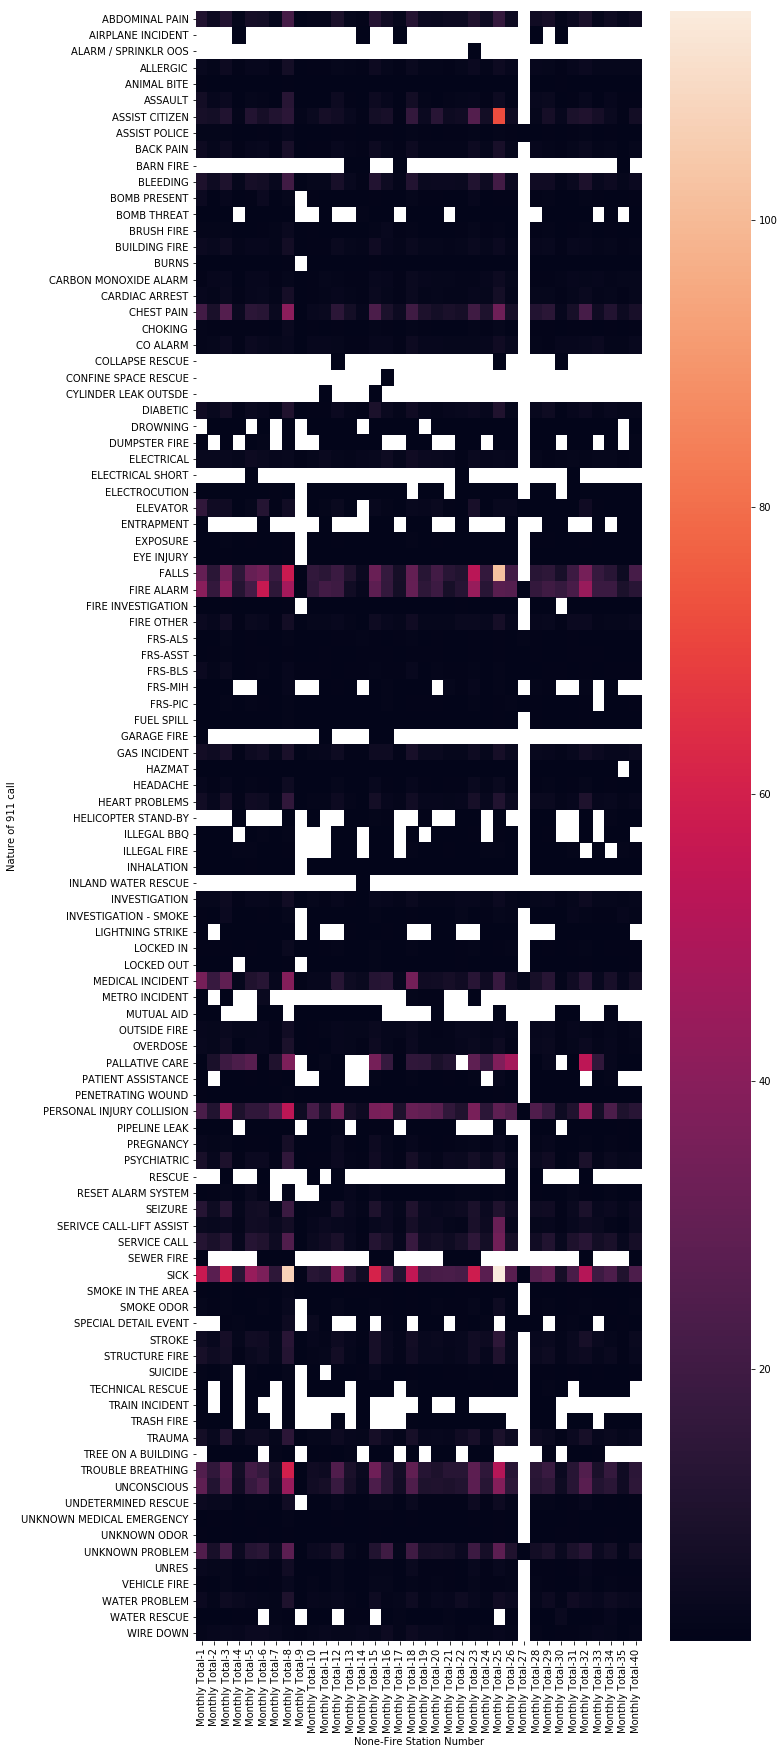

In [75]:
fig, ax = plt.subplots(figsize=(10,30))
sns.heatmap(FS, )

# I'm a volunteer EMT by the weekends
# Station 27 is known for never getting calls. It's confirmed, lol.
# Airplane incidents, alarm w sprinkler oos, collapse resuce, etc. are rare


In [53]:
p = df.drop(['Year', 'Month', 'Fire Station Number', 'nature', 'station', 'BYstations', 'MonthNum','MonthTotal','falls_num','fallsL','pred','SUICIDE','FIRE_ALARM'], axis=1)
MS = pd.pivot_table(p, index = ['Nature of 911 call'], columns = ['Month Num'])
MS

Monthly Total                                   \
Month Num                            1          2          3          4    
Nature of 911 call                                                         
ABDOMINAL PAIN                 6.580838   6.125000   6.621951   6.588957   
AIRPLANE INCIDENT                   NaN        NaN        NaN        NaN   
ALARM / SPRINKLR OOS                NaN        NaN        NaN        NaN   
ALLERGIC                       2.419847   2.710345   2.929577   2.898551   
ANIMAL BITE                    1.115385   1.000000   1.258065   1.257143   
ASSAULT                        2.968504   3.017699   3.415254   3.388889   
ASSIST CITIZEN                10.515625   9.348485  10.553846  10.454545   
ASSIST POLICE                  1.655738   1.583333   1.557377   1.888889   
BACK PAIN                      3.102041   2.878788   3.301370   3.302158   
BARN FIRE                           NaN   1.000000   1.000000        NaN   
BLEEDING                       6.829114   6.209581   6.618182   6.125000   
BOMB PRESENT                   1.958333   1.770492   2.051282   1.868852   
BOMB THREAT                    1.000000   1.090909   1.000000   1.250000   
BRUSH FIRE                     1.411765   1.176471   1.804878   2.625000   
BUILDING FIRE                  4.014085   3.828571   3.242857   3.205479   
BURNS                          1.392857   1.142857   1.256410   1.083333   
CARBON MONOXIDE ALARM          3.032787   2.887097   2.245614   2.590909   
CARDIAC ARREST                 3.300699   2.951724   3.061224   2.858108   
CHEST PAIN                    13.035294  12.186047  13.164706  11.895349   
CHOKING                        1.726316   1.711111   1.915789   1.551020   
CO ALARM                       3.521277   2.717647   2.987805   2.493976   
COLLAPSE RESCUE                     NaN   1.000000        NaN   1.000000   
CONFINE SPACE RESCUE                NaN        NaN        NaN   1.000000   
CYLINDER LEAK OUTSDE                NaN   1.000000   1.000000        NaN   
DIABETIC                       4.019481   3.532895   4.204082   3.932432   
DROWNING                       1.000000   1.000000   1.000000   1.000000   
DUMPSTER FIRE                  1.250000   1.000000   1.000000   1.230769   
ELECTRICAL                     2.982609   2.469565   5.024390   3.000000   
ELECTRICAL SHORT               1.000000        NaN        NaN        NaN   
ELECTROCUTION                  1.000000   1.000000   1.250000   1.000000   
...                                 ...        ...        ...        ...   
PSYCHIATRIC                    4.614865   4.552448   4.818182   4.737931   
RESCUE                         1.000000   1.000000   1.000000        NaN   
RESET ALARM SYSTEM             2.117647   1.272727   1.444444   1.444444   
SEIZURE                        6.264151   5.469136   6.290123   5.709091   
SERIVCE CALL-LIFT ASSIST       5.263158   4.297872   4.393617   4.021978   
SERVICE CALL                  12.603960   8.353535   9.323529   8.434343   
SEWER FIRE                     1.000000   1.000000   1.000000   1.000000   
SICK                          38.356725  32.333333  34.172414  31.424419   
SMOKE IN THE AREA              1.306122   1.465116   1.487805   1.476190   
SMOKE ODOR                     2.234043   2.094340   2.066667   1.736842   
SPECIAL DETAIL EVENT           1.000000   1.000000   1.250000   1.357143   
STROKE                         5.018182   4.636943   4.664671   4.932515   
STRUCTURE FIRE                 5.643564   4.361702   5.185567   4.757895   
SUICIDE                        1.750000   1.714286   1.800000   1.789474   
TECHNICAL RESCUE               1.200000   1.250000   1.125000   1.000000   
TRAIN INCIDENT                 1.000000        NaN   1.000000   1.000000   
TRASH FIRE                     1.200000   1.000000   1.500000   1.000000   
TRAUMA                         4.360759   4.202532   4.931677   4.693252   
TREE ON A BUILDING                  NaN   1.333333   1.000000   1.000000  

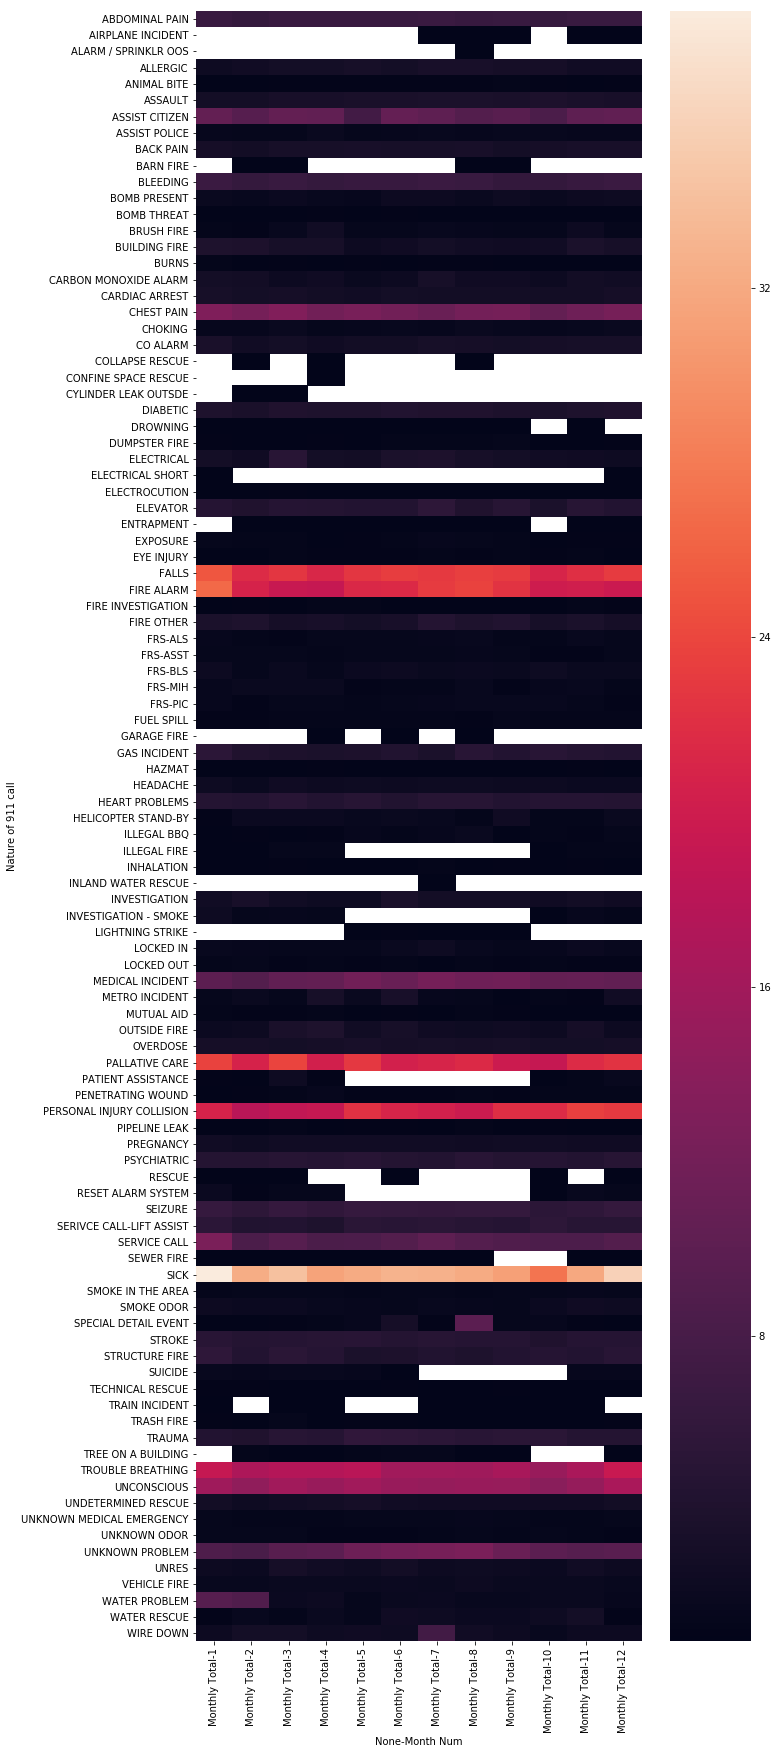

In [76]:
fig, ax = plt.subplots(figsize=(10,30))
sns.heatmap(MS, )

# Falls, pallative, collision, fire alarms very common throughout the year

In [59]:
p = df.drop(['Nature of 911 call', 'Month', 'Year', 'nature', 'station', 'BYstations', 'MonthNum','MonthTotal','falls_num','fallsL','pred','SUICIDE','FIRE_ALARM'], axis=1)
FMS = pd.pivot_table(p, index = ['Fire Station Number'], columns = ['Month Num'])
FMS

Monthly Total                                              \
Month Num                      1          2          3          4          5    
Fire Station Number                                                             
1                       11.619512  10.146919  10.732057  10.169725  10.149780   
2                        6.000000   5.437158   6.218750   5.768041   5.694175   
3                       13.144681  10.951111  11.820628  10.451754  10.429167   
4                        5.129496   4.263158   4.856164   4.296552   4.333333   
5                        8.566667   7.964467   8.075829   7.350962   8.009615   
6                        9.222772   8.172589   8.188406   8.111111   8.626866   
7                        5.228395   4.691275   4.954839   4.714286   5.050955   
8                       16.940239  15.816667  16.610656  15.897119  16.704981   
9                        1.625000   1.613636   1.975000   1.711111   1.765957   
10                       4.743243   4.302013   4.324324   3.728395   4.251572   
11                       4.523490   3.604938   3.949045   3.936709   4.355828   
12                       8.110000   7.260870   7.653266   6.902326   7.261261   
13                       3.742857   3.530864   3.709877   3.529412   3.867470   
14                       2.495868   2.300000   2.446281   2.341270   2.629032   
15                      11.079295   9.724771  10.359307  10.328947  10.156951   
16                       7.242574   6.527919   6.634615   6.840796   7.184466   
17                       3.392857   3.441176   3.211921   2.979021   3.317568   
18                      11.241071   9.758929  10.572687   9.655172  10.293860   
19                       5.849741   5.252577   5.530928   5.376289   5.934783   
20                       6.486486   5.422460   6.049180   5.271795   6.130435   
21                       5.104396   4.651042   4.983425   4.821229   5.451087   
22                       5.565217   4.625000   4.597765   4.470270   4.873684   
23                      12.039648  10.678899  11.281250  10.241071  10.957983   
24                       6.177419   5.891429   5.747312   5.647059   5.945355   
25                      17.558952  16.175926  17.311404  16.419214  16.395652   
26                       7.830769   6.917582   7.590426   6.708333   7.155440   
27                       1.800000   1.666667   2.400000   1.833333   1.428571   
28                       5.788177   5.306011   5.589744   5.602094   5.755208   
29                       7.117949   6.414894   6.359606   6.235000   6.538462   
30                       3.537190   3.090909   3.194030   3.330645   3.082192   
31                       6.789474   4.988764   5.053476   5.340659   5.568528   
32                      11.699454  11.519417  11.306604  11.284360  11.861111   
33                       5.680473   5.081761   5.139665   4.832370   5.335366   
34                       6.261084   5.772487   5.629630   5.631841   5.266990   
35                       3.803797   3.323944   3.195804   2.908497   2.973684   
40                       6.011236   5.747059   5.940828   5.514286   5.614525   

                                                                            \
Month Num                   6          7          8          9          10   
Fire Station Number                                                          
1                    10.782407  10.881279  11.063927  11.270936   9.931818   
2                     5.891753   6.128713   6.335052   5.910891   6.162500   
3                    10.859649  10.361702  10.689956  10.560870  10.317949   
4                     4.288462   4.726619   4.711268   4.483221   4.570248   
5                     8.359606   7.736111   7.946860   8.305000   7.988827   
6                     8.517241   8.711009   9.159204   8.180095   8.372222   
7                     4.802469   4.871795   5.057325   5.204082   5.647541   
8                    17.190083  16.823293  17.971074  16.893878  15.893023   
9 

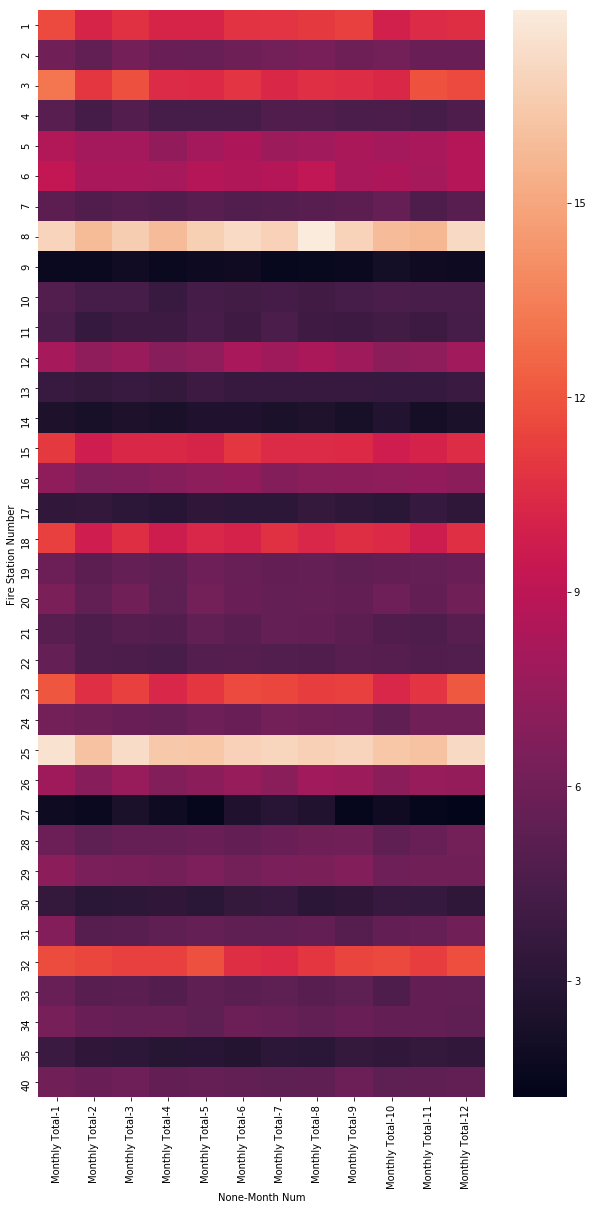

In [81]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(FMS, )



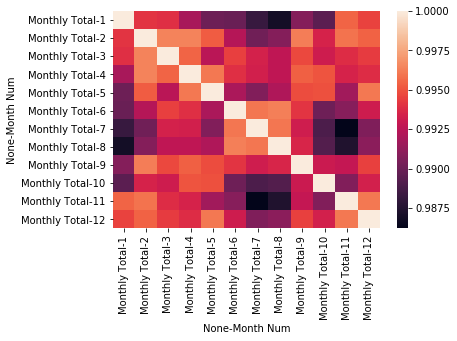

In [69]:
sns.heatmap(FMS.corr())